# 1.) Import the data from CCLE into a new Google Colab file

In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [5]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.
df.loc[df["smoker"] == "yes", "smoker"] = 1
df.loc[df["smoker"] == "no", "smoker"] = 0

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1,3,16884.92400
1,18,0.0,33.770,1,0,2,1725.55230
2,28,0.0,33.000,3,0,2,4449.46200
3,33,0.0,22.705,0,0,1,21984.47061
4,32,0.0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,0,1,10600.54830
1334,18,1.0,31.920,0,0,0,2205.98080
1335,18,1.0,36.850,0,0,2,1629.83350
1336,21,1.0,25.800,0,0,3,2007.94500


In [12]:
import numpy as np

In [15]:
#slicing to get all rows and columns up until region
data = np.array(df.iloc[:,:6])
#slicing to get all rows and the last column
target = np.array(df.iloc[:,-1])

# 2.) Split the data into 80/20, in/out sample

In [17]:
cut = int((len(data) * .8) //1) # 700

In [18]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [27]:
#Normalizing by subtracting mean and scaling to standard deviation
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [28]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [29]:
from sklearn.linear_model import LassoCV

In [30]:
modCV = LassoCV().fit(in_data_scale, in_target )

In [31]:
a = modCV.alpha_ #Optimized Lambda

In [32]:
a

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [33]:
from sklearn.linear_model import Lasso

In [40]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [41]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

In [51]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Coefficients of variables')

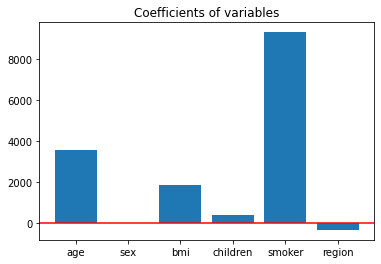

In [57]:
var = ["age", "sex", "bmi", "children", "smoker", "region"]
plt.bar(var, mod1.coef_)
plt.axhline(y=0, color='red')
plt.title("Coefficients of variables")

# 7.) Interpret the coefficients

Sex doesn't affect the insurance charges. As for the rest, they are positively associated with insurance charges apart from region. A smoker is associated with much higher insurance charges, while an older person is also associated with higher insurance charges.

# 8.) Compare in and out of sample MSE’s

In [ ]:
#mod1.predict("in sample data")
#mod1.predict("out of sample data")

In [47]:
from sklearn.metrics import mean_squared_error
pred_in = mod1.predict(np.array(in_data_scale))
mse_in = mean_squared_error(in_target, pred_in )
mse_in

36490415.101693384

In [48]:
pred_out = mod1.predict(np.array(out_data_scale))
mse_out = mean_squared_error(out_target, pred_out)
mse_out

37252730.724018715